In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yt
import caesar
import matplotlib.colors as colors
import cmasher as cmr

/blue/narayanan/a.ravishankar/py38/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/a.ravishankar/.config/yt/ytrc is deprecated in favor of /home/a.ravishankar/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [3]:
sigma_df_1 = pd.read_csv("/blue/narayanan/a.ravishankar/slick/repo/projected_sigma_lists_z_1_parr_rot.csv")
sigma_df_2 = pd.read_csv("/blue/narayanan/a.ravishankar/slick/repo/projected_sigma_lists_z_2_parr_rot.csv")
sigma_df_3 = pd.read_csv("/blue/narayanan/a.ravishankar/slick/repo/projected_sigma_lists_z_3_parr_rot.csv")

radii_df_1 = pd.read_csv("/blue/narayanan/a.ravishankar/slick/repo/results/snapshot_1_radii_projected_fix.csv")
radii_df_2 = pd.read_csv("/blue/narayanan/a.ravishankar/slick/repo/results/snapshot_2_radii_projected_fix.csv")
radii_df_3 = pd.read_csv("/blue/narayanan/a.ravishankar/slick/repo/results/snapshot_3_radii_projected_fix.csv")

In [6]:
max(sigma_df_2["Mol_gas_sigma"][np.where(sigma_df_2["Galaxy_ID"]==1)[0]])

2666162635.48283

In [23]:
gal_df = (sigma_df_2.sort_values(by='dist')).reset_index(drop=True)
temp = np.where((gal_df["Galaxy_ID"]==1) & (gal_df["Mol_gas_sigma"]>=0))[0]
total_CO10 = np.array(np.cumsum(gal_df["CO10_sigma"][temp]))
total_CO21 = np.array(np.cumsum(gal_df["CO21_sigma"][temp]))
total_CO32 = np.array(np.cumsum(gal_df["CO32_sigma"][temp]))
total_CO43 = np.array(np.cumsum(gal_df["CO43_sigma"][temp]))
total_Mol = np.array(np.cumsum(gal_df["Mol_gas_sigma"][temp]))

xx = 0.5

half_CO10_radius = np.array(gal_df["dist"][temp])[np.where(total_CO10>=float(total_CO10[-1]*xx))[0][0]]
half_CO21_radius = np.array(gal_df["dist"][temp])[np.where(total_CO21>=float(total_CO21[-1]*xx))[0][0]]
half_CO32_radius = np.array(gal_df["dist"][temp])[np.where(total_CO32>=float(total_CO32[-1]*xx))[0][0]]
half_CO43_radius = np.array(gal_df["dist"][temp])[np.where(total_CO43>=float(total_CO43[-1]*xx))[0][0]]
half_Mol_radius = np.array(gal_df["dist"][temp])[np.where(total_Mol>=float(total_Mol[-1]*xx))[0][0]]

In [59]:
total_CO10[-1]*0.8/1e10,total_CO43[-1]*0.8/1e10

(4.5795594532457, 1.9204468220082016)

In [67]:
cut = np.where(gal_df["dist"][temp]<8.5)[0]
np.sum(np.array(gal_df["CO10_sigma"][temp])[cut])/1e10

4.666810144148094

In [65]:
cut = np.where(gal_df["dist"][temp]<8)[0]
np.sum(np.array(gal_df["CO43_sigma"][temp])[cut])/1e10

1.968909686259429

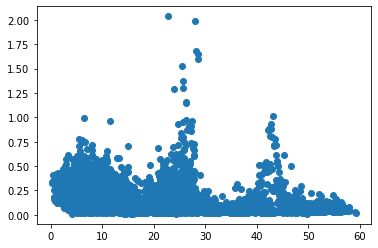

In [30]:
x_axis = np.array(gal_df["dist"][temp])
y_axis = np.array(gal_df["CO43_sigma"][temp]/gal_df["CO10_sigma"][temp])

plt.scatter(x_axis,y_axis)
plt.show()

In [16]:
gal_df["dist"][temp]

188        0.237898
235        0.265930
897        0.525021
932        0.538303
1096       0.580986
            ...    
281022    58.271280
281023    58.411872
281024    58.770979
281025    58.950943
281026    59.270683
Name: dist, Length: 6912, dtype: float64

In [29]:
half_CO10_radius,half_CO21_radius,half_CO32_radius,half_CO43_radius,half_Mol_radius

(5.945247904916729,
 5.97371016879707,
 5.945247904916729,
 5.843033834449527,
 6.532173511694915)

In [3]:
x_axis,CO10,CO21,CO32,CO43,H2 = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

for index in range(0,len(radii_df_1)):
    
    #condition = np.where((sigma_df_1["Galaxy_ID"]==radii_df_1["Galaxy_ID"][index]) & (sigma_df_1["Mol_gas_sigma"]>=1e8) & (sigma_df_1["Mol_gas_sigma"]<1e9) & ((sigma_df_1["CO10_sigma"])>0) & ((sigma_df_1["sfr_sigma"])>0))[0]
    condition = np.where((sigma_df_1["Galaxy_ID"]==radii_df_1["Galaxy_ID"][index]) & (sigma_df_1["Mol_gas_sigma"]>0) & ((sigma_df_1["CO10_sigma"])>0))[0]
    half_H2_size = radii_df_1["half_Mol_gas_mass_radius"][index]
    x_axis = np.append(x_axis,(np.array(sigma_df_1["dist"][condition]/half_H2_size)))
    #if max(np.array(sigma_df_1["dist"][condition]/half_H2_size))>10:
    #    print(radii_df_1["Galaxy_ID"][index])
    #CO10 = np.append(CO10,np.array(np.log10(sigma_df_1["CO10_sigma"][condition])))
    #H2 = np.append(H2,np.array(np.log10(sigma_df_1["Mol_gas_sigma"][condition])))

In [92]:
selected_ids_df = pd.read_csv("/blue/narayanan/a.ravishankar/slick/repo/snap_z_2_MS.csv")
selected_ids_array = np.array(selected_ids_df)
print(selected_ids_array[206])

[269]


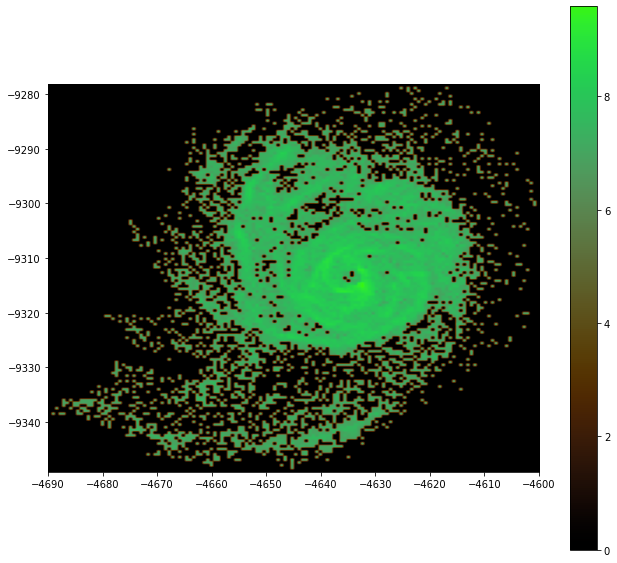

In [25]:
import cmasher as cmr

cmap = cmr.tree

plt.figure(figsize=(11,10))
condition = np.where((sigma_df_1["Galaxy_ID"]==1) & (sigma_df_1["Mol_gas_sigma"]>=0))[0]
dx = 0.5
x = np.arange(min(sigma_df_1["x"][condition])-0.5,max(sigma_df_1["x"][condition])+1,0.5)
z = np.arange(min(sigma_df_1["z"][condition])-0.5,max(sigma_df_1["z"][condition])+1,0.5)
grid = np.zeros((len(z), len(x)), dtype=float)
x,z = np.meshgrid(x,z)
x, z = [item.flatten() for item in (x,z)]
idx = np.round((x - x.min()) / dx).astype(int)
idz = np.round((z - z.min()) / dx).astype(int)
for i in range(len(condition)):
    tempidx = np.round((sigma_df_1["x"][condition[i]] - x.min()) / dx).astype(int)
    tempidz = np.round((sigma_df_1["z"][condition[i]] - z.min()) / dx).astype(int)
    grid[tempidz,tempidx]+= np.log10(sigma_df_1["gas_sigma"][condition[i]])
#grid[idz,idx] = sigma_df_1["Mol_gas_sigma"][condition]#np.hypot(x - x.mean(), z - z.mean()).flatten()#
plt.imshow(grid, interpolation='antialiased',extent=(-4690, -4600, z.min(),z.max()),cmap=cmap)
plt.colorbar()
plt.show()

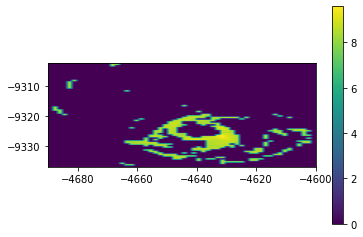

In [6]:
condition = np.where((sigma_df_1["Galaxy_ID"]==1) & (sigma_df_1["Mol_gas_sigma"]>=1e8))[0]
dx = 0.5
x = np.arange(min(sigma_df_1["x"][condition])-0.5,max(sigma_df_1["x"][condition])+1,0.5)
z = np.arange(min(sigma_df_1["z"][condition])-0.5,max(sigma_df_1["z"][condition])+1,0.5)
grid = np.zeros((len(z), len(x)), dtype=float)
x,z = np.meshgrid(x,z)
x, z = [item.flatten() for item in (x,z)]
idx = np.round((x - x.min()) / dx).astype(int)
idz = np.round((z - z.min()) / dx).astype(int)
for i in range(len(condition)):
    tempidx = np.round((sigma_df_1["x"][condition[i]] - x.min()) / dx).astype(int)
    tempidz = np.round((sigma_df_1["z"][condition[i]] - z.min()) / dx).astype(int)
    grid[tempidz,tempidx]+= np.log10(sigma_df_1["gas_sigma"][condition[i]])
#grid[idz,idx] = sigma_df_1["Mol_gas_sigma"][condition]#np.hypot(x - x.mean(), z - z.mean()).flatten()#
plt.imshow(grid, interpolation='antialiased',extent=(-4690, -4600, z.min(),z.max()),cmap='viridis')
plt.colorbar()
plt.show()

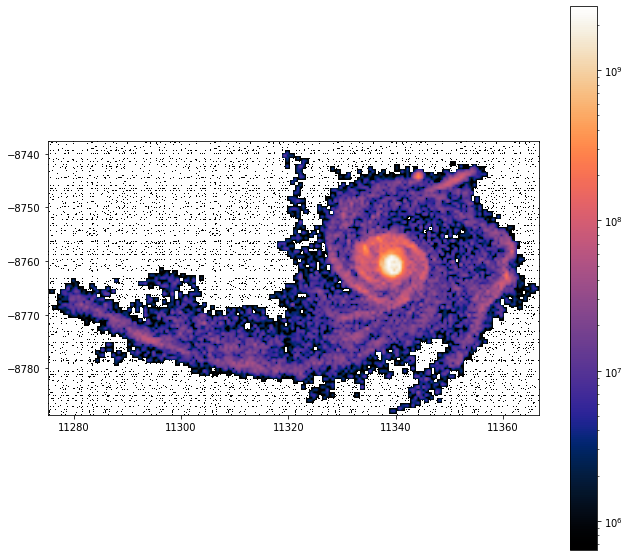

In [86]:
#cmap = cmr.dusk
#cmap = cmr.ember
#cmap = cmr.chroma
#cmap = cmr.rainforest
cmap = cmr.torch #amazing!
#cmap = cmr.savanna

plt.figure(figsize=(11,10))

condition = np.where((sigma_df_2["Galaxy_ID"]==1) & (sigma_df_2["Mol_gas_sigma"]>=0))[0]
dx = 0.5
x = np.arange(min(sigma_df_2["x"][condition])-0.5,max(sigma_df_2["x"][condition])+1,0.5)
z = np.arange(min(sigma_df_2["z"][condition])-0.5,max(sigma_df_2["z"][condition])+1,0.5)
grid = np.zeros((len(z), len(x)), dtype=float)
x,z = np.meshgrid(x,z)
x, z = [item.flatten() for item in (x,z)]
idx = np.round((x - x.min()) / dx).astype(int)
idz = np.round((z - z.min()) / dx).astype(int)
for i in range(len(condition)):
    tempidx = np.round((sigma_df_2["x"][condition[i]] - x.min()) / dx).astype(int)
    tempidz = np.round((sigma_df_2["z"][condition[i]] - z.min()) / dx).astype(int)
    grid[tempidz,tempidx]+= (sigma_df_2["Mol_gas_sigma"][condition[i]])
#grid[idz,idx] = sigma_df_2["Mol_gas_sigma"][condition]#np.hypot(x - x.mean(), z - z.mean()).flatten()#
#boxsize = max(x.max()-x.min(),z.max()-z.min())
plt.imshow(grid, interpolation='bilinear',extent=(x.min(), x.max(), z.min(),z.max()),cmap=cmap,norm=colors.LogNorm())
plt.colorbar()
#plt.savefig("sample_plot_torch.jpg",dpi=200)
plt.show()

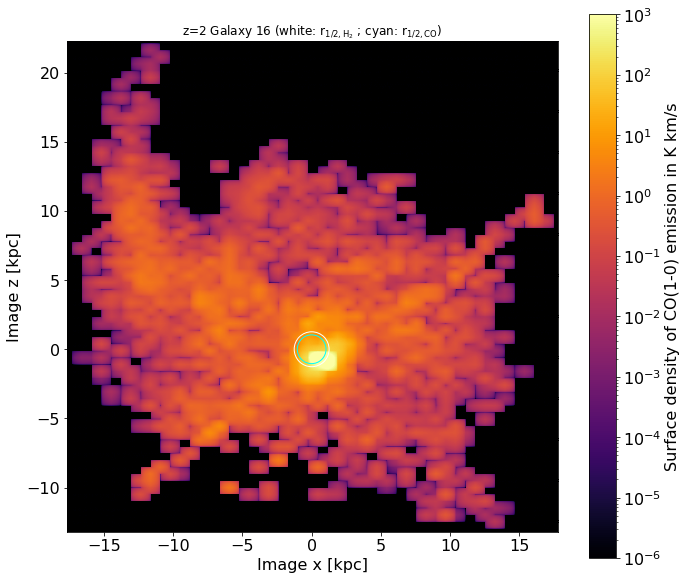

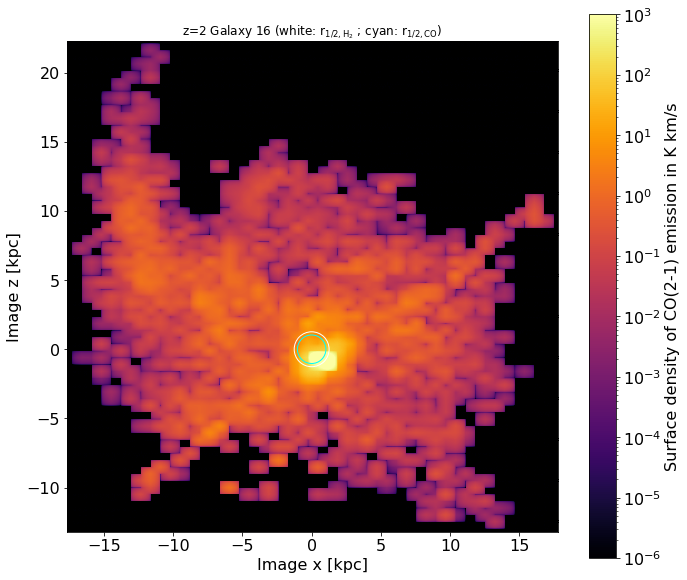

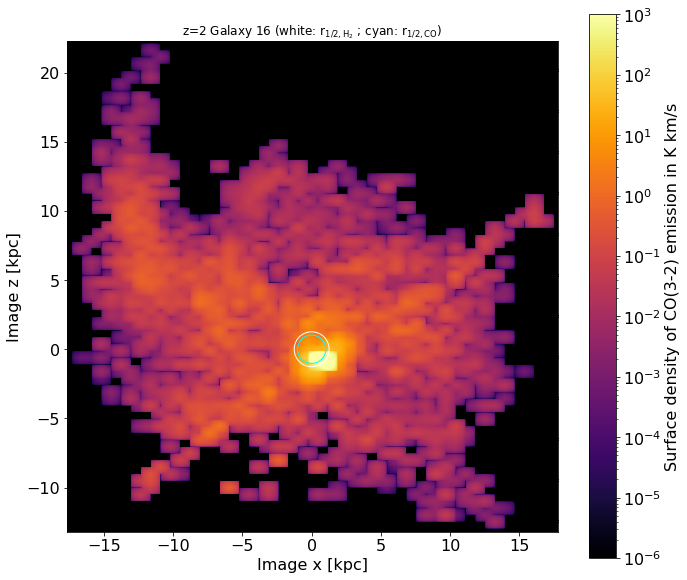

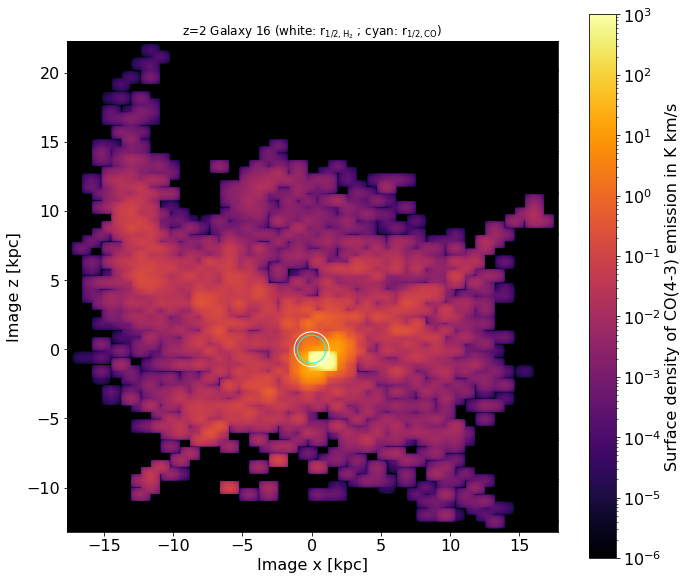

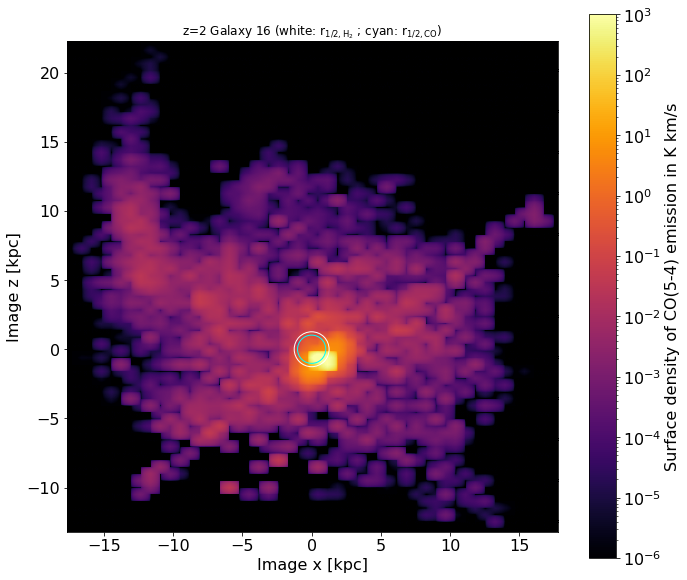

In [5]:
#CO images

labelsize = 16
gal_id = 16

df_names = ["CO10","CO21","CO32","CO43","CO54"]
label_names = ["CO(1-0)","CO(2-1)","CO(3-2)","CO(4-3)","CO(5-4)"]

for rot_J in range(0,5):

    plt.figure(figsize=(11,10))
    condition = np.where((sigma_df_2["Galaxy_ID"]==gal_id) & (sigma_df_2["Mol_gas_sigma"]>=0) & (sigma_df_2["Mol_gas_sigma"]<=1e100))[0]
    dx = 0.5
    x = np.arange(min(sigma_df_2["x"][condition])-0.5,max(sigma_df_2["x"][condition])+1,0.5)
    z = np.arange(min(sigma_df_2["z"][condition])-0.5,max(sigma_df_2["z"][condition])+1,0.5)
    grid = np.zeros((len(z), len(x)), dtype=float)
    x,z = np.meshgrid(x,z)
    x, z = [item.flatten() for item in (x,z)]
    idx = np.round((x - x.min()) / dx).astype(int)
    idz = np.round((z - z.min()) / dx).astype(int)
    for i in range(len(condition)):
        tempidx = np.round((sigma_df_2["x"][condition[i]] - x.min()) / dx).astype(int)
        tempidz = np.round((sigma_df_2["z"][condition[i]] - z.min()) / dx).astype(int)
        grid[tempidz,tempidx]+= (sigma_df_2[f"{df_names[rot_J]}_sigma"][condition[i]])*1e-6
    #grid[idz,idx] = sigma_df_2["Mol_gas_sigma"][condition]#np.hypot(x - x.mean(), z - z.mean()).flatten()#
    boxsize = abs(max(x.max()-x.min(),z.max()-z.min()))
    center = [sigma_df_2["x_pos"][condition[0]],sigma_df_2["z_pos"][condition[0]]]
    plt.imshow(grid, interpolation='bilinear',extent=(((x.max()+x.min())/2-boxsize/2)-center[0], ((x.max()+x.min())/2+boxsize/2)-center[0], center[1]-((z.max()+z.min())/2+boxsize/2), center[1]-((z.max()+z.min())/2-boxsize/2)),cmap='inferno',norm=colors.LogNorm(vmin=1e-6,vmax=1e3))
    H2_half_radius_circle = plt.Circle((0, 0), radii_df_2["half_Mol_gas_mass_radius"][np.where(radii_df_2["Galaxy_ID"]==gal_id)[0]], color='white', fill=False)
    CO_half_radius_circle = plt.Circle((0, 0), radii_df_2[f"half_{df_names[rot_J]}_radius"][np.where(radii_df_2["Galaxy_ID"]==gal_id)[0]], color='cyan', fill=False)
    ax = plt.gca()
    ax.set_facecolor('black')
    ax.add_patch(H2_half_radius_circle)
    ax.add_patch(CO_half_radius_circle)
    plt.xlabel("Image x [kpc]",fontsize=labelsize)
    plt.ylabel("Image z [kpc]",fontsize=labelsize)
    #plt.xticks(np.linspace(-60,30,10))
    #plt.yticks(np.linspace(-40,40,9))
    plt.tick_params(axis='both',labelsize=labelsize)
    cbar = plt.colorbar(ticks=[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000])
    cbar.set_label(f"Surface density of {label_names[rot_J]} emission in K km/s",fontsize=labelsize)
    cbar.ax.tick_params(labelsize=labelsize)
    plt.title(f"z=2 Galaxy {gal_id}"+" (white: $\mathrm{r_{1/2,H_2}}$ ; cyan: $\mathrm{r_{1/2,CO}}$)")
    #plt.savefig(f"galaxy {gal_id} {label_names[rot_J]} emission plot.jpg",dpi=200)
    plt.show()

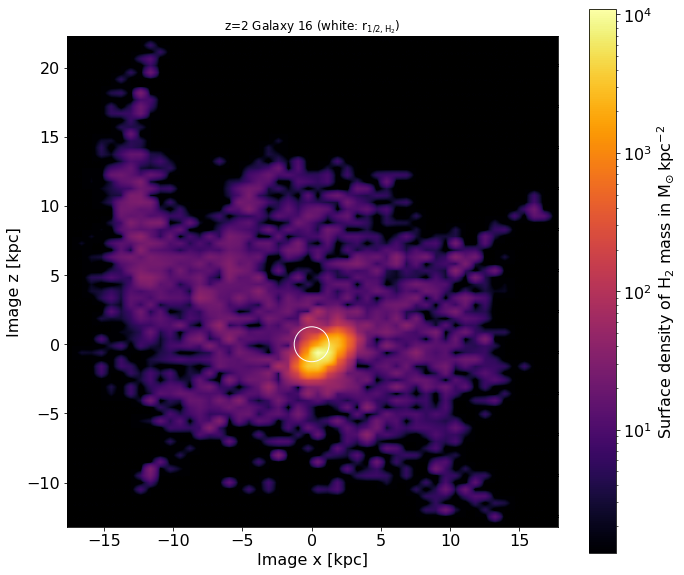

In [8]:
#H2 image

labelsize = 16
gal_id = 16

plt.figure(figsize=(11,10))
condition = np.where((sigma_df_2["Galaxy_ID"]==gal_id) & (sigma_df_2["Mol_gas_sigma"]>=0) & (sigma_df_2["Mol_gas_sigma"]<=1e100))[0]
dx = 0.5
x = np.arange(min(sigma_df_2["x"][condition])-0.5,max(sigma_df_2["x"][condition])+1,0.5)
z = np.arange(min(sigma_df_2["z"][condition])-0.5,max(sigma_df_2["z"][condition])+1,0.5)
grid = np.zeros((len(z), len(x)), dtype=float)
x,z = np.meshgrid(x,z)
x, z = [item.flatten() for item in (x,z)]
idx = np.round((x - x.min()) / dx).astype(int)
idz = np.round((z - z.min()) / dx).astype(int)
for i in range(len(condition)):
    tempidx = np.round((sigma_df_2["x"][condition[i]] - x.min()) / dx).astype(int)
    tempidz = np.round((sigma_df_2["z"][condition[i]] - z.min()) / dx).astype(int)
    grid[tempidz,tempidx]+= (sigma_df_2["Mol_gas_sigma"][condition[i]])*1e-6

boxsize = abs(max(x.max()-x.min(),z.max()-z.min()))
center = [sigma_df_2["x_pos"][condition[0]],sigma_df_2["z_pos"][condition[0]]]
plt.imshow(grid, interpolation='bilinear',extent=(((x.max()+x.min())/2-boxsize/2)-center[0], ((x.max()+x.min())/2+boxsize/2)-center[0], center[1]-((z.max()+z.min())/2+boxsize/2), center[1]-((z.max()+z.min())/2-boxsize/2)),cmap='inferno',norm=colors.LogNorm())
H2_half_radius_circle = plt.Circle((0, 0), radii_df_2["half_Mol_gas_mass_radius"][np.where(radii_df_2["Galaxy_ID"]==gal_id)[0]], color='white', fill=False)
#CO_half_radius_circle = plt.Circle((0, 0), radii_df_2[f"half_{df_names[rot_J]}_radius"][np.where(radii_df_2["Galaxy_ID"]==gal_id)[0]], color='cyan', fill=False)
ax = plt.gca()
ax.set_facecolor('black')
ax.add_patch(H2_half_radius_circle)
#ax.add_patch(CO_half_radius_circle)
plt.xlabel("Image x [kpc]",fontsize=labelsize)
plt.ylabel("Image z [kpc]",fontsize=labelsize)
#plt.xticks(np.linspace(-60,30,10))
#plt.yticks(np.linspace(-40,40,9))
plt.tick_params(axis='both',labelsize=labelsize)
cbar = plt.colorbar()
cbar.set_label("Surface density of $\mathrm{H_2}$ mass in $\mathrm{M_{\odot}\,kpc^{-2}}$",fontsize=labelsize)
cbar.ax.tick_params(labelsize=labelsize)
plt.title(f"z=2 Galaxy {gal_id}"+" (white: $\mathrm{r_{1/2,H_2}}$)")
#plt.savefig(f"galaxy {gal_id} H2 plot.jpg",dpi=200)
plt.show()

In [49]:
max((sigma_df_2["CO54_sigma"][condition])*1e-6)

14.465764263054705

In [21]:
center,boxsize,radii_df_2["half_Mol_gas_mass_radius"][np.where(radii_df_2["Galaxy_ID"]==gal_id)[0]]

([3871.866357350789, -10540.003119746909],
 22.5,
 5    3.329164
 Name: half_Mol_gas_mass_radius, dtype: float64)

In [25]:
import yt.units as u

a = 25*u.Mpc/0.69/3
print(a.to("kpc")/1e4)

1.2077294685990339 kpc


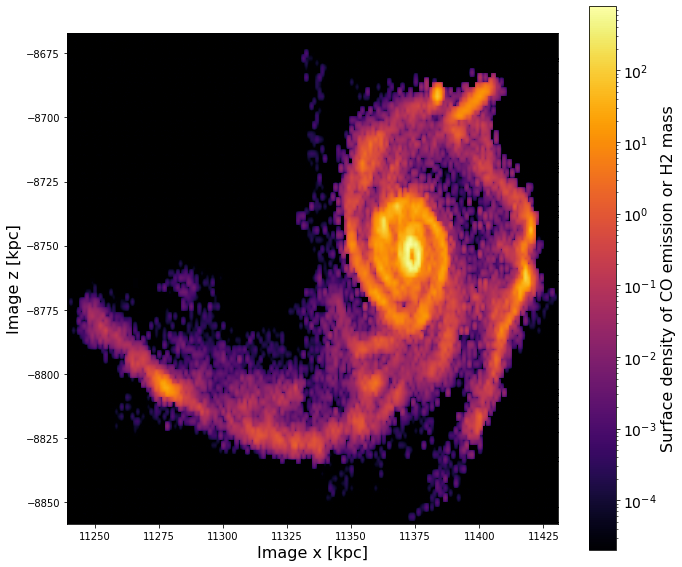

In [7]:
#cmap = cmr.dusk
#cmap = cmr.ember
#cmap = cmr.chroma
#cmap = cmr.rainforest
cmap = cmr.torch #amazing!
#cmap = cmr.savanna
labelsize = 16

plt.figure(figsize=(11,10))

condition = np.where((sigma_df_2["Galaxy_ID"]==1) & (sigma_df_2["Mol_gas_sigma"]>=0) & (sigma_df_2["Mol_gas_sigma"]<=1e100))[0]
dx = 0.5
x = np.arange(min(sigma_df_2["x"][condition])-0.5,max(sigma_df_2["x"][condition])+1,0.5)
z = np.arange(min(sigma_df_2["z"][condition])-0.5,max(sigma_df_2["z"][condition])+1,0.5)
grid = np.zeros((len(z), len(x)), dtype=float)
x,z = np.meshgrid(x,z)
x, z = [item.flatten() for item in (x,z)]
idx = np.round((x - x.min()) / dx).astype(int)
idz = np.round((z - z.min()) / dx).astype(int)
for i in range(len(condition)):
    tempidx = np.round((sigma_df_2["x"][condition[i]] - x.min()) / dx).astype(int)
    tempidz = np.round((sigma_df_2["z"][condition[i]] - z.min()) / dx).astype(int)
    grid[tempidz,tempidx]+= (sigma_df_2["CO43_sigma"][condition[i]])*1e-6
#grid[idz,idx] = sigma_df_2["Mol_gas_sigma"][condition]#np.hypot(x - x.mean(), z - z.mean()).flatten()#
boxsize = max(x.max()-x.min(),z.max()-z.min())+100
center = [sigma_df_2["x_pos"][condition[0]],sigma_df_2["z_pos"][condition[0]]]
plt.imshow(grid, interpolation='bilinear',extent=(center[0]-boxsize/2, center[0]+boxsize/2, center[1]-boxsize/2, center[1]+boxsize/2),cmap='inferno',norm=colors.LogNorm())
ax = plt.gca()
ax.set_facecolor('black')
plt.xlabel("Image x [kpc]",fontsize=labelsize)
plt.ylabel("Image z [kpc]",fontsize=labelsize)
cbar = plt.colorbar()
cbar.set_label("Surface density of CO emission or H2 mass",fontsize=labelsize)
cbar.ax.tick_params(labelsize=14)
#plt.savefig("sample_plot_torch.jpg",dpi=200)
plt.show()

In [5]:
center

[11334.932080575798, -8762.706538353814]

In [1]:
import numpy as np
import yt
import caesar
import pandas as pd
obj = caesar.load("/orange/narayanan/desika.narayanan/gizmo_runs/simba/m25n512/output/Groups/caesar_0160_z2.000.hdf5")
#print(obj.galaxies[1].vel)
ds = yt.load("/orange/narayanan/desika.narayanan/gizmo_runs/simba/m25n512/output/snapshot_160.hdf5")
#vel_gas = ds.r["PartType0","velocity"][clouds_in_this_galaxy[0]].in_units("km/s").value
#clouds_in_this_galaxy = obj.galaxies[1].glist
#angmom_gas = ds.r["PartType0","angular_momentum"][clouds_in_this_galaxy]
#L_x = np.sum(angmom_gas[:,0])
#L_y = np.sum(angmom_gas[:,1])
#L_z = np.sum(angmom_gas[:,2])
#L = np.array([L_x,L_y,L_z])
#p = yt.OffAxisProjectionPlot(yt_snap, vector_L, ("gas", "density"), center = yt_snap.arr([11349.67816,8720.21890129,2578.69200312],"kpc"), width=(100, "kpc"))
#p.show()
#p = yt.ProjectionPlot(yt_snap, "y", ("gas", "density"), center = yt_snap.arr([11349.67816,8720.21890129,2578.69200312],"kpc"), width=(100, "kpc"))
#p.show()
#p.save("test.jpg")

/blue/narayanan/a.ravishankar/py38/lib/python3.8/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/a.ravishankar/.config/yt/ytrc is deprecated in favor of /home/a.ravishankar/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg
yt : [INFO     ] 2023-06-20 07:24:18,999 Opening /orange/narayanan/desika.narayanan/gizmo_runs/simba/m25n512/output/Groups/caesar_0160_z2.000.hdf5
yt : [INFO     ] 2023-06-20 07:24:19,284 Found 102394 halos
yt : [INFO     ] 2023-06-20 07:24:19,290 Found 2195 galaxies
yt : [INFO     ] 2023-06-20 07:24:19,295 Found 21346 clouds
yt : [INFO     ] 2023-06-20 07:24:19,401 Calculating time from 3.334e-01 to be 1.048e+17 seconds
yt : [INFO     ] 2023-06-20 07:24:19,404 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2023-06-20 07:24:19,466 Parameters: curr

In [15]:
obj.galaxies[1].radii['gas'].in_units("kpc"),obj.galaxies[1].pos.in_units("kpc")

(unyt_quantity(63.14634293, 'kpc'),
 unyt_array([11349.67816   ,  8720.21890129,  2578.69200312], 'kpc'))

yt : [INFO     ] 2023-06-20 07:36:41,185 xlim = 827.326084 907.326084
yt : [INFO     ] 2023-06-20 07:36:41,185 ylim = 6157.501616 6237.501616
yt : [INFO     ] 2023-06-20 07:36:41,186 xlim = 1687.595032 1850.780510
yt : [INFO     ] 2023-06-20 07:36:41,186 ylim = 12560.185570 12723.371048
yt : [INFO     ] 2023-06-20 07:36:41,189 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



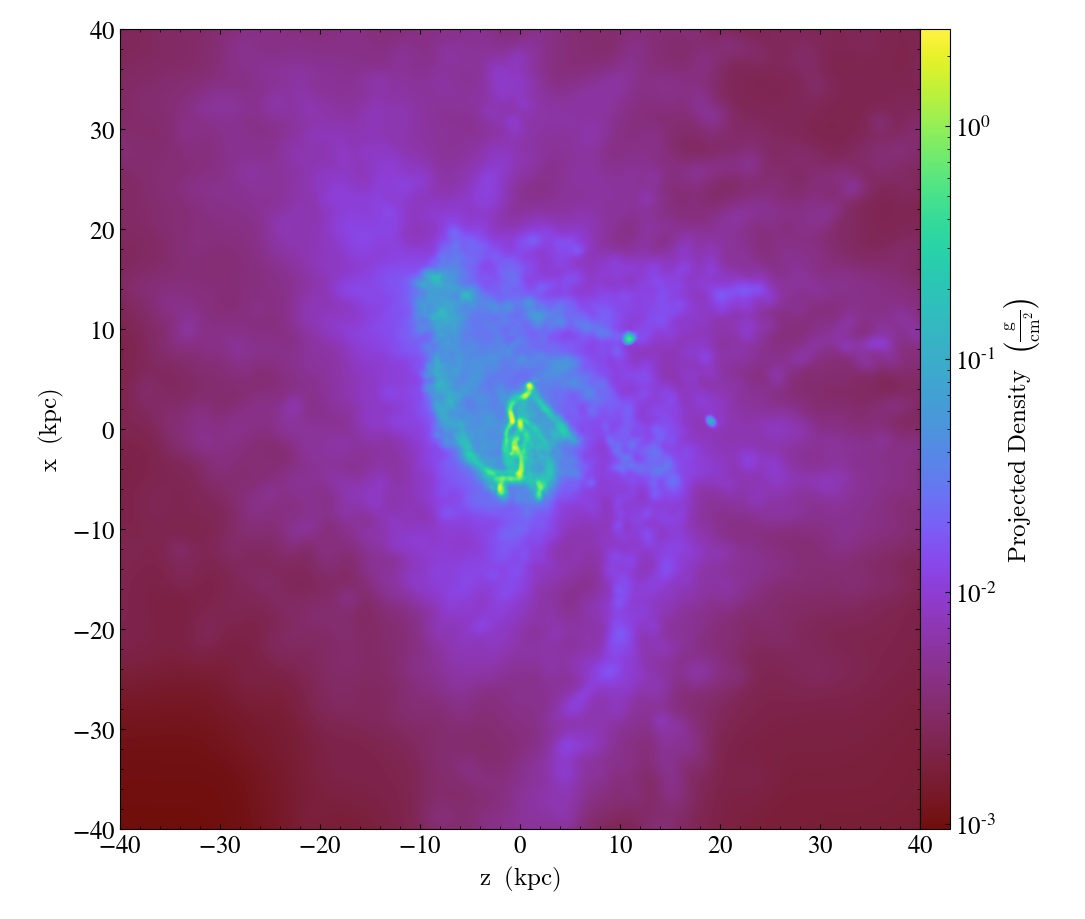

In [12]:
p = yt.ProjectionPlot(ds, "y", ("gas", "density"), center = ds.arr([6197.50161633,9910.90407307,867.32608375],"kpc"), width=(80, "kpc"))
p.show()

In [10]:
selected_ids_df = pd.read_csv("/blue/narayanan/a.ravishankar/slick/repo/snap_z_2_MS.csv")
print(selected_ids_df)
print(obj.galaxies[3].pos.in_units("kpc"))

     GroupID
0          1
1          2
2          3
3          5
4          7
..       ...
263      575
264      578
265      676
266      679
267      832

[268 rows x 1 columns]
[6197.50161633 9910.90407307  867.32608375] kpc


In [18]:
selected_ids_array = np.array(selected_ids_df["GroupID"])
clouds_in_each_galaxy = [(gal.GroupID,gal.glist,gal.masses['gas'].in_units('Msun').value,gal.masses['H2'].in_units('Msun').value,gal.radii['baryon_half_mass'].in_units('pc').value,gal.metallicities['mass_weighted'].value,gal.masses['stellar'].in_units('Msun').value) for gal in [obj.galaxies[int(GroupID)] for GroupID in selected_ids_array]]
for cloud in clouds_in_each_galaxy[0:1]:
    
    clouds_in_this_galaxy = cloud[1]

In [9]:
obj = caesar.load("/orange/narayanan/desika.narayanan/gizmo_runs/simba/m25n512/output/Groups/caesar_0160_z2.000.hdf5")
print(obj.galaxies[1].pos.in_units("kpc"))

yt : [INFO     ] 2023-06-19 06:39:06,154 Opening /orange/narayanan/desika.narayanan/gizmo_runs/simba/m25n512/output/Groups/caesar_0160_z2.000.hdf5
yt : [INFO     ] 2023-06-19 06:39:06,243 Found 102394 halos
yt : [INFO     ] 2023-06-19 06:39:06,249 Found 2195 galaxies
yt : [INFO     ] 2023-06-19 06:39:06,253 Found 21346 clouds


[11349.67816     8720.21890129  2578.69200312] kpc


In [26]:
obj.halos[0].pos.in_units("kpc")

unyt_array([6989.2073938 , 8373.96605909, 4247.66639973], 'kpc')